# Patchify and plot images

Refer to [the installation section in README](https://github.com/Living-with-machines/MapReader#installation) to install `mapreader`.

In [1]:
# solve issue with autocomplete
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2
%matplotlib inline

## Load images

Example images taken from the openly accessible `CVPPP2014_LSV_training_data` dataset available from https://www.plant-phenotyping.org/datasets-download

In [2]:
from mapreader import loader
path2images = "./dataset/open_access_plant/*.png"
myimgs = loader(path2images)

In [3]:
my_files=loader("../../geospatial/classification_one_inch_maps_001/maps/*png")
my_files.add_metadata(metadata="../../geospatial/classification_one_inch_maps_001/maps/metadata.csv")

In [4]:
my_files.sliceAll(slice_size=50, path_save='../../geospatial/classification_one_inch_maps_001/maps/slice_50_50/')

Slicing ../../geospatial/classification_one_inch_maps_001/maps/map_74488689.png
----------------------------------------
Slicing ../../geospatial/classification_one_inch_maps_001/maps/map_74488700.png
----------------------------------------
Slicing ../../geospatial/classification_one_inch_maps_001/maps/map_101168192.png
----------------------------------------


In [5]:
parent_list=my_files.list_parents()
child_list=my_files.list_children()

In [6]:
my_files.calc_pixel_stats()

----------
[INFO] calculate pixel stats for image: map_74488689.png
----------
[INFO] calculate pixel stats for image: map_74488700.png
----------
[INFO] calculate pixel stats for image: map_101168192.png


In [8]:
parent_df, patch_df = my_files.convertImages()

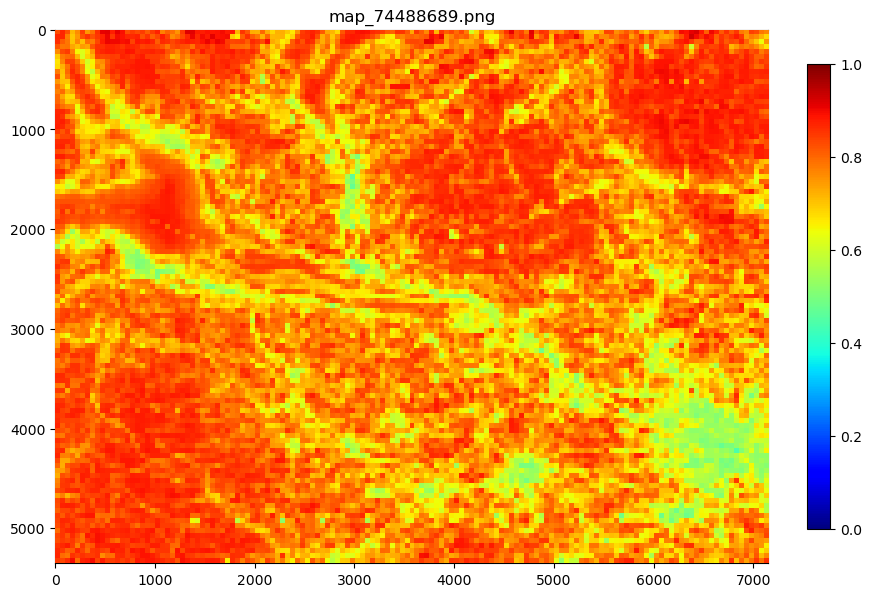

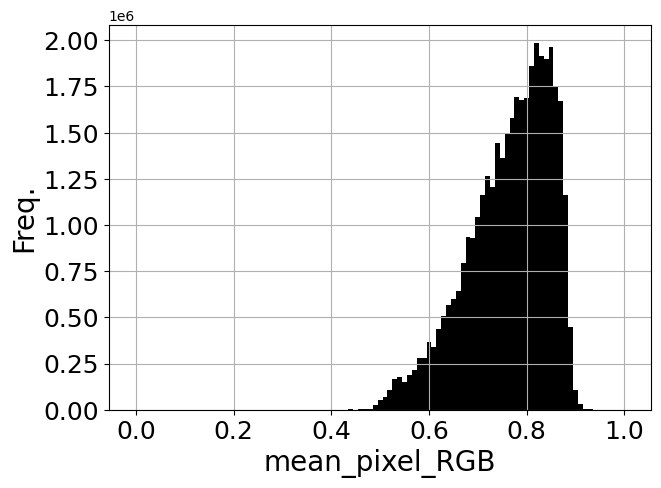

In [14]:
value='mean_pixel_RGB'
vmin=0
vmax=1

my_files.show_par(parent_list[0], value=value, vmin=vmin, vmax=vmax, border=False)

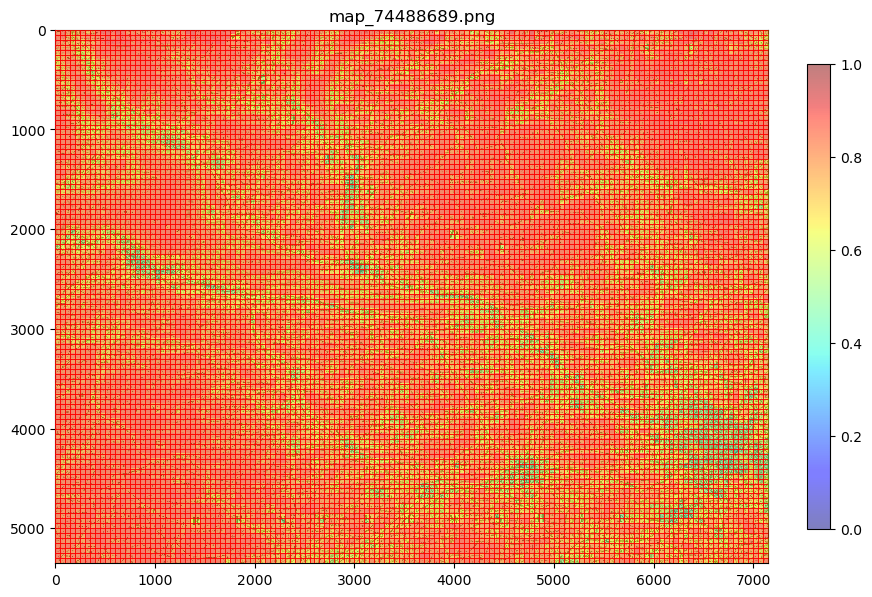

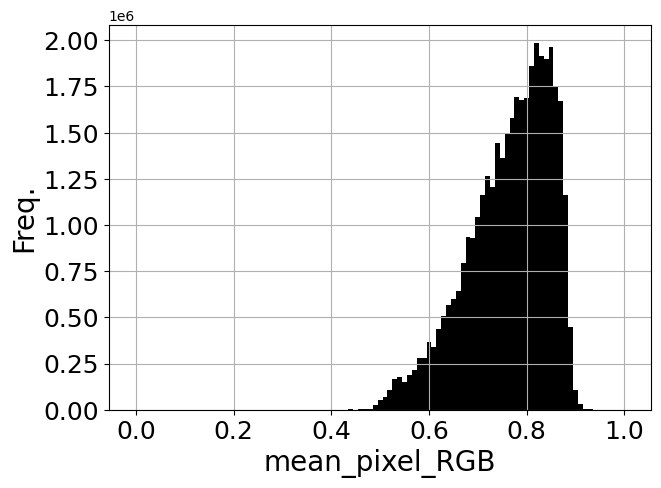

In [16]:
    my_files.show_par(parent_list[0], value=value, vmin=vmin, vmax=vmax, alpha=0.5)

In [ ]:
# len() shows the total number of images currently read (or sliced, see below)
print(f"Number of images: {len(myimgs)}")

In [2]:
# To get more information
print(myimgs)

#images: 2

#parents: 2
2014-06-06_plant001_rgb.png
2014-07-17_plant047_rgb.png

#children: 0



## Plot sample images

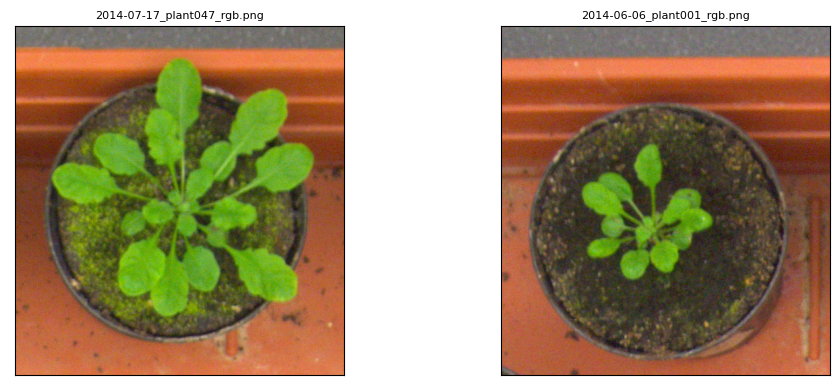

In [3]:
myimgs.show_sample(num_samples=2, tree_level="parent")

## Show one image

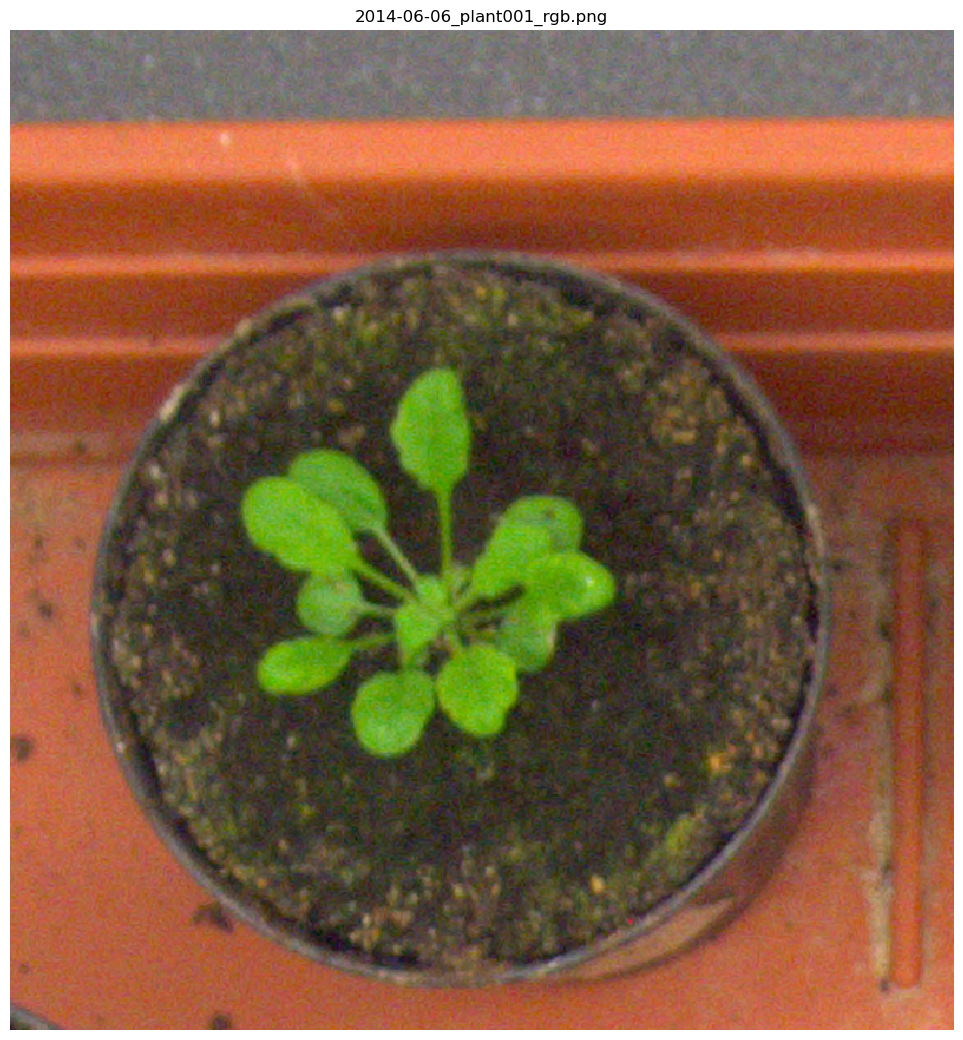

In [38]:
# list of all images (and not patches)
all_imgs = myimgs.list_parents()

# list of all patches (i.e., patches)
# all_patches = myimgs.list_children()

myimgs.show(all_imgs[0], 
            tree_level="parent", 
            # to change the resolution of the image for plotting
            image_width_resolution=800)

## Slice images

In [40]:
# `method` can also be set to meters
myimgs.sliceAll(path_save="./dataset/eg_slice_50_50", 
                slice_size=50, # in pixels
                square_cuts=False, 
                verbose=False,
                method="pixel")

Slicing dataset/open_access_plant/2014-06-06_plant001_rgb.png
----------------------------------------
Slicing dataset/open_access_plant/2014-07-17_plant047_rgb.png
----------------------------------------


In [58]:
parent_list=myimgs.list_parents()
print(parent_list)

child_list=myimgs.list_children()

['2014-06-06_plant001_rgb.png', '2014-07-17_plant047_rgb.png']


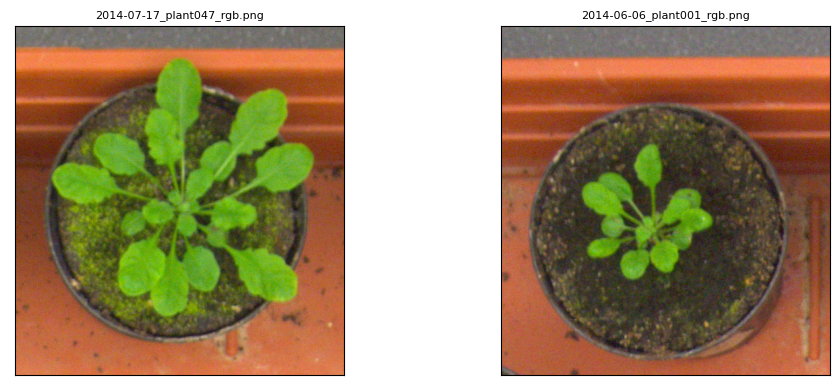

In [9]:
myimgs.show_sample(num_samples=2)

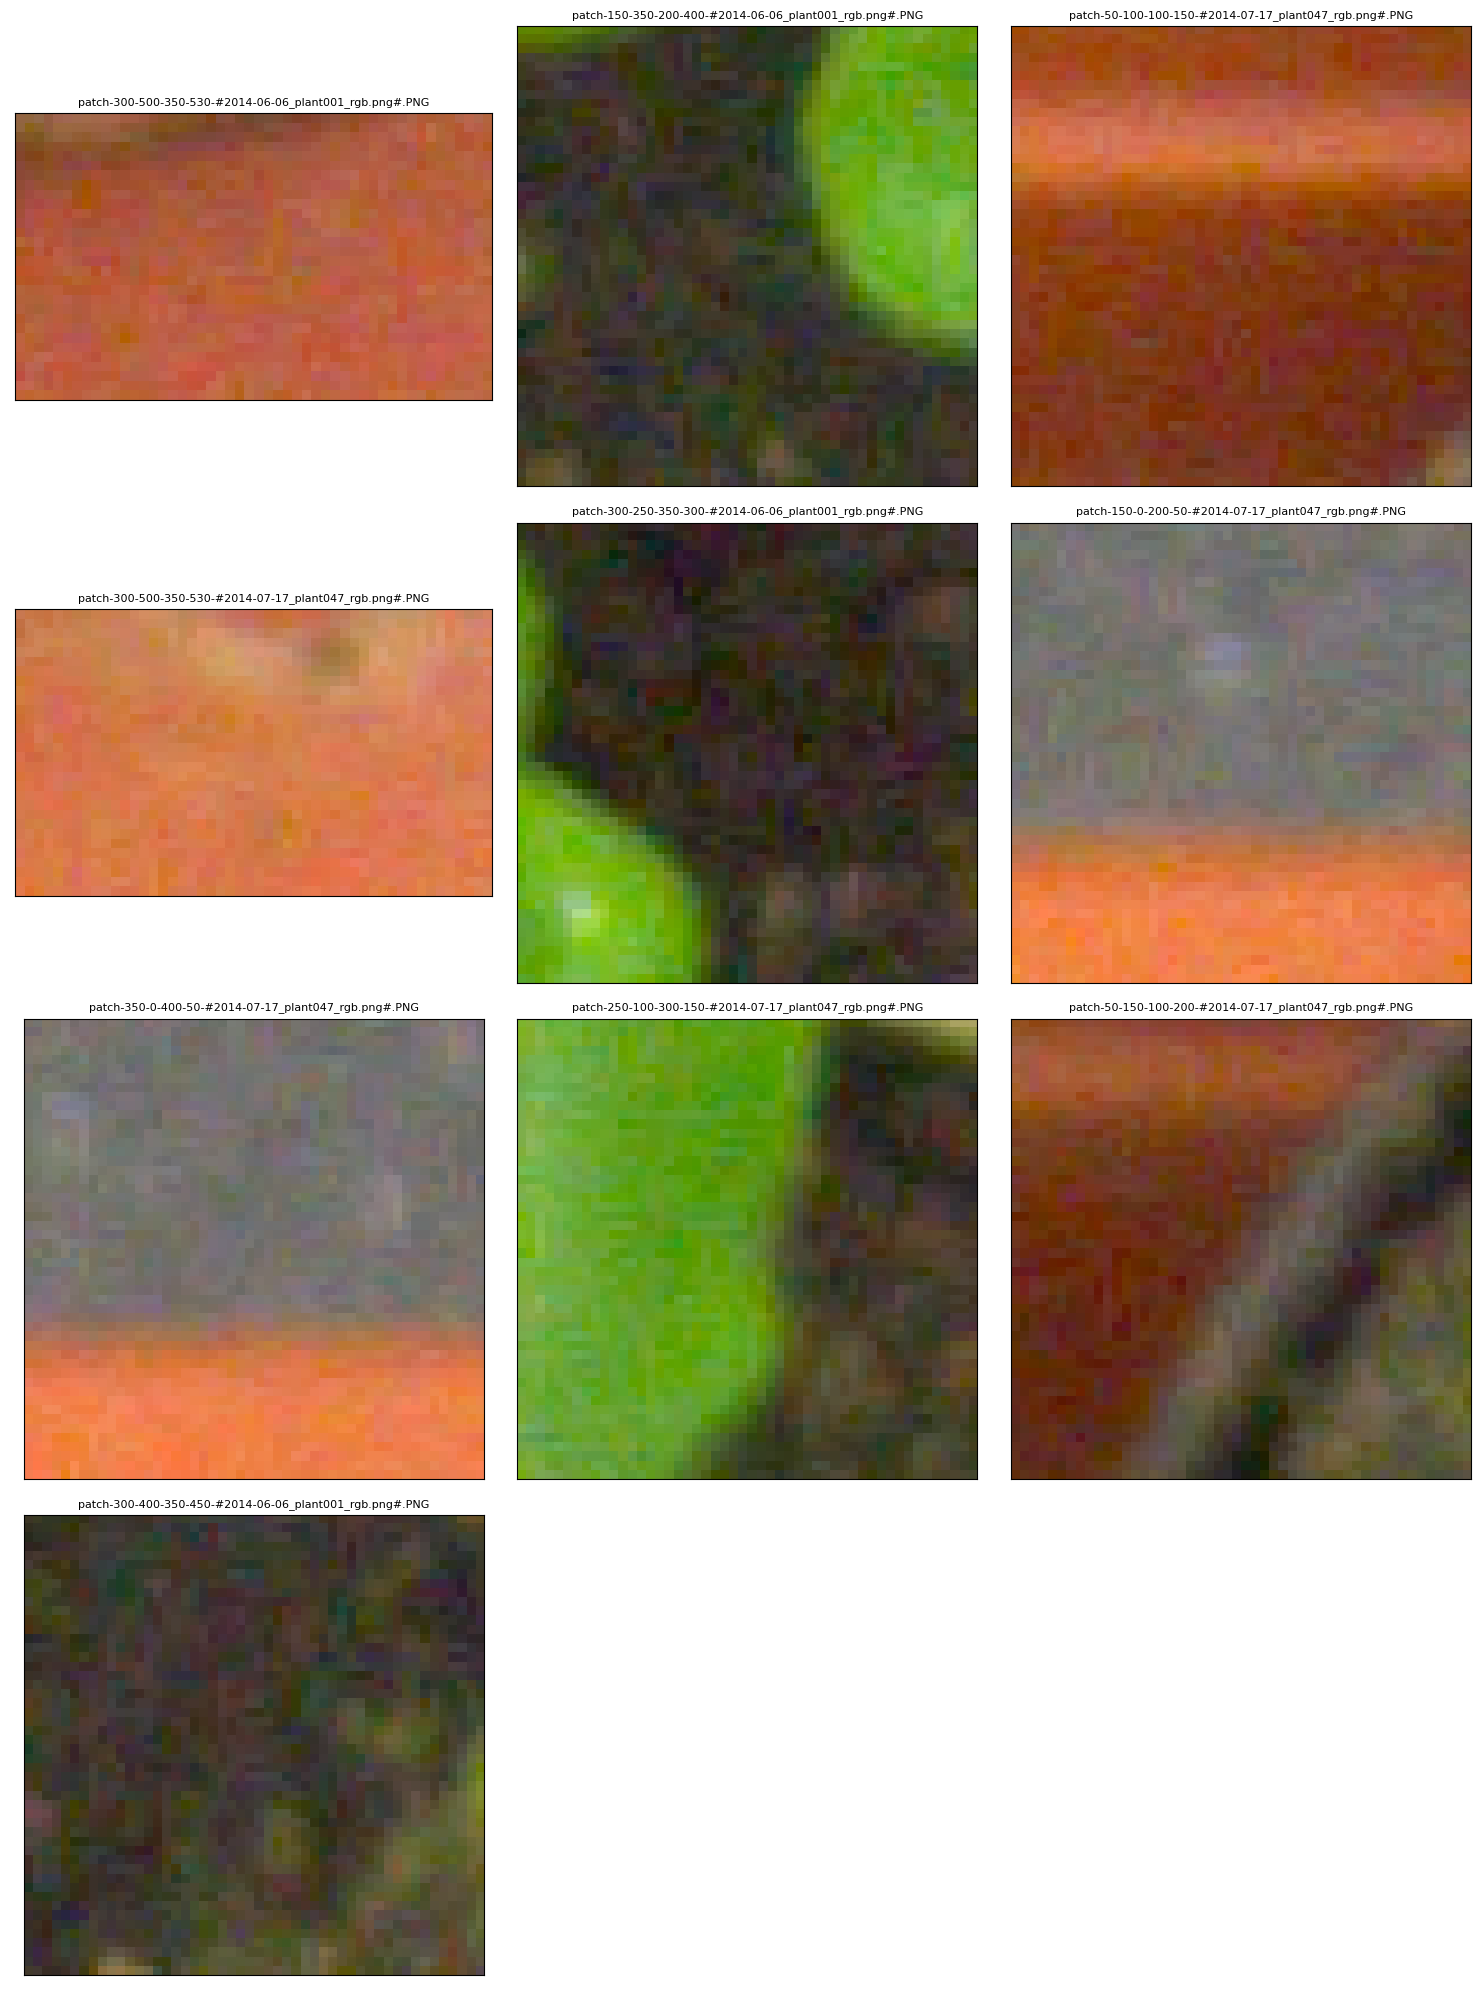

In [12]:
myimgs.show_sample(10, tree_level="child")

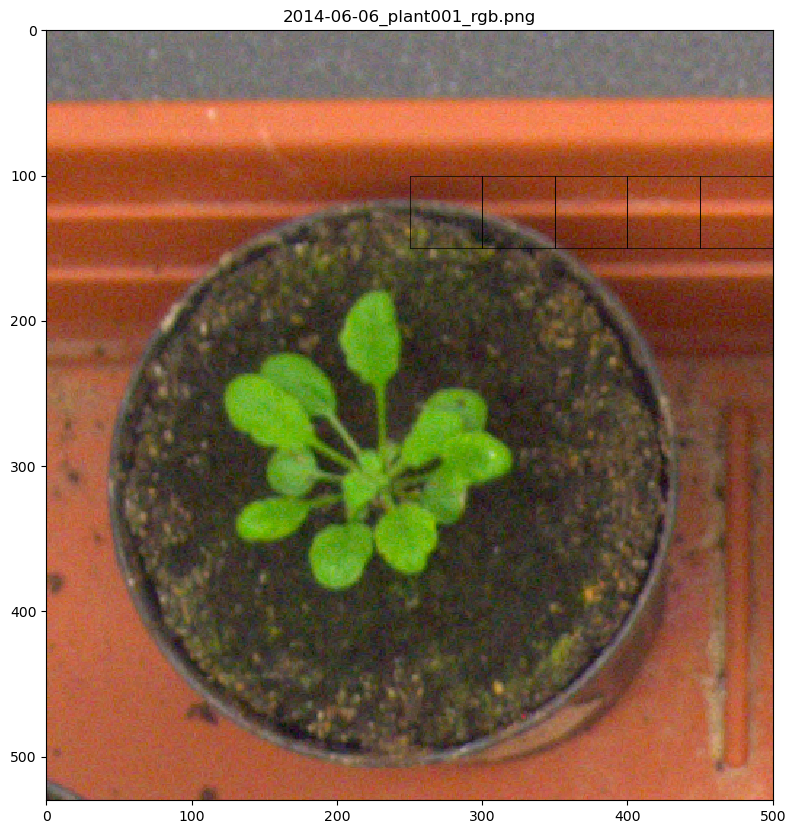

In [25]:
myimgs.show(child_list[25:30],border_color='k')

## Show one image and its patches

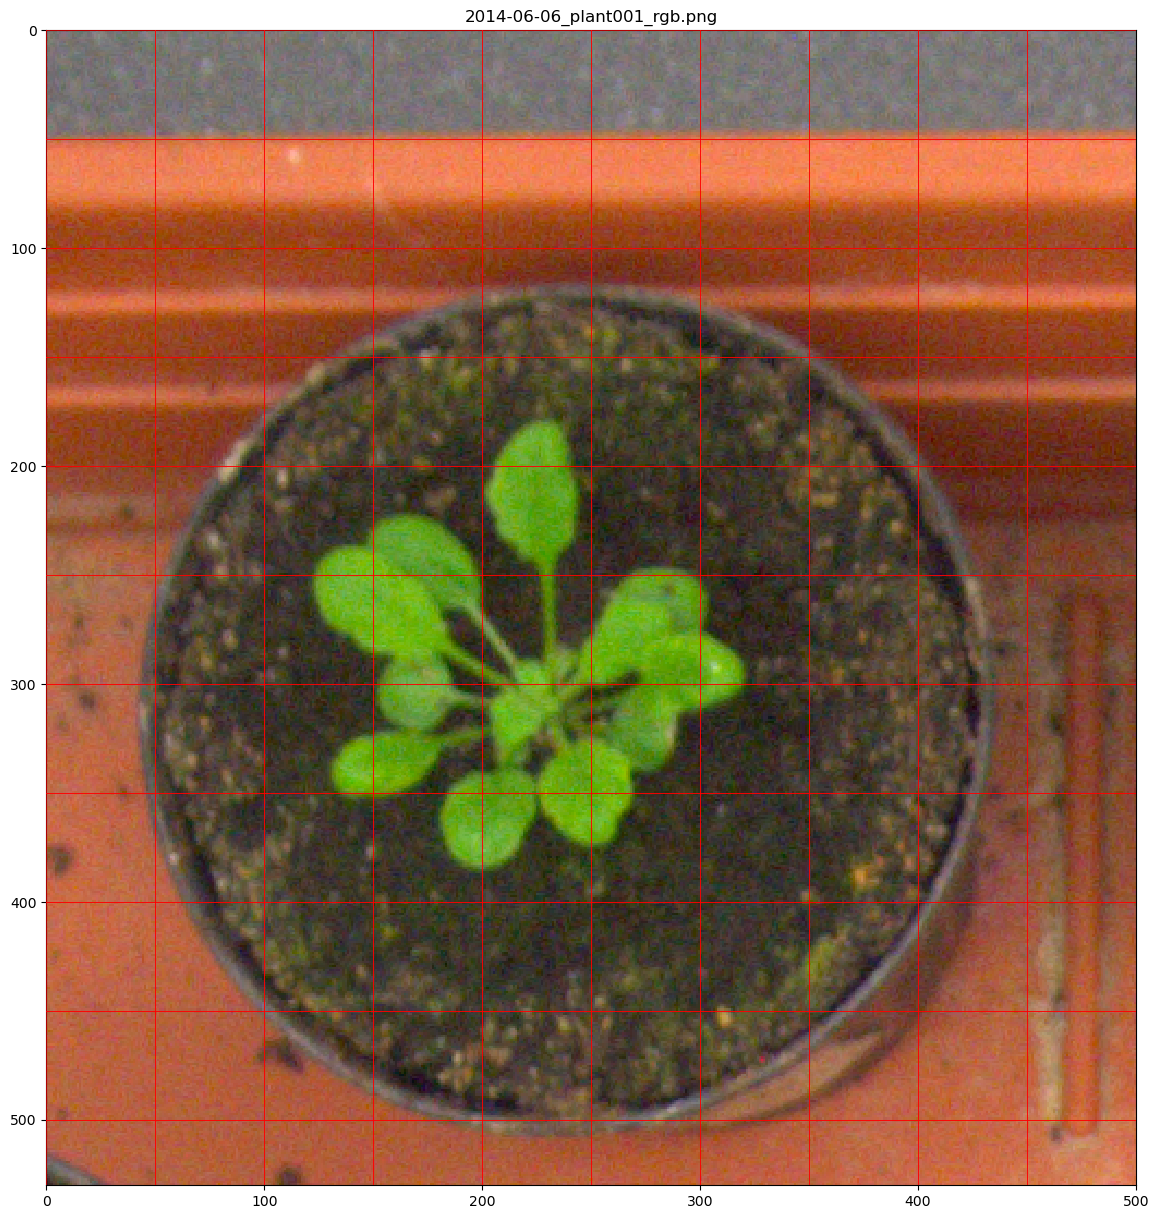

In [26]:
# List of all images
all_imgs = list(myimgs.images["parent"].keys())

myimgs.show_par(all_imgs[0], 
                border=True, 
                plot_parent=True,
                figsize=(15, 15))

## Calculate mean and standard-deviation of pixel intensities

`calc_pixel_stats` method can be used to calculate mean and standard-deviation of pixel intensities of each `child` (i.e., `patch`) in a `parent` image.

In [54]:
# if parent_id="XXX", only compute pixel stats for that parent
myimgs.calc_pixel_stats()

----------
[INFO] calculate pixel stats for image: 2014-06-06_plant001_rgb.png
----------
[INFO] calculate pixel stats for image: 2014-07-17_plant047_rgb.png


In [55]:
print(myimgs)

#images: 222

#parents: 2
2014-06-06_plant001_rgb.png
2014-07-17_plant047_rgb.png

#children: 220
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#.PNG
patch-100-0-150-50-#2014-06-06_plant001_rgb.png#.PNG
patch-150-0-200-50-#2014-06-06_plant001_rgb.png#.PNG
patch-200-0-250-50-#2014-06-06_plant001_rgb.png#.PNG
patch-250-0-300-50-#2014-06-06_plant001_rgb.png#.PNG
patch-300-0-350-50-#2014-06-06_plant001_rgb.png#.PNG
patch-350-0-400-50-#2014-06-06_plant001_rgb.png#.PNG
patch-400-0-450-50-#2014-06-06_plant001_rgb.png#.PNG
patch-450-0-500-50-#2014-06-06_plant001_rgb.png#.PNG
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#.PNG
...



In [56]:
parent_df, patch_df= myimgs.convertImages()
patch_df

parent_id  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG   2014-06-06_plant001_rgb.png   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...  2014-06-06_plant001_rgb.png   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
...                                                                         ...   
patch-250-500-300-530-#2014-07-17_plant047_rgb....  2014-07-17_plant047_rgb.png   
patch-300-500-350-530-#2014-07-17_plant047_rgb....  2014-07-17_plant047_rgb.png   
patch-350-500-400-530-#2014-07-17_plant047_rgb....  2014-07-17_plant047_rgb.png   
patch-400-500-450-530-#2014-07-17_plant047_rgb....  2014-07-17_plant047_rgb.png   
patch-450-500-500-530-#2014-07-17_plant047_rgb....  2014-07-17_plant047_rgb.png   

                                                                                           image_path  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG   /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/examples/non-geospa...   
...                                                                                               ...   
patch-250-500-300-530-#2014-07-17_plant047_rgb....  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-300-500-350-530-#2014-07-17_plant047_rgb....  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-350-500-400-530-#2014-07-17_plant047_rgb....  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-400-500-450-530-#2014-07-17_plant047_rgb....  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-450-500-500-530-#2014-07-17_plant047_rgb....  /Users/rwood/LwM/MapReader/examples/non-geospa...   

                                                    min_x  min_y  max_x  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG       0      0     50   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...     50      0    100   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...    100      0    150   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...    150      0    200   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...    200      0    250   
...                                                   ...    ...    ...   
patch-250-500-300-530-#2014-07-17_plant047_rgb....    250    500    300   
patch-300-500-350-530-#2014-07-17_plant047_rgb....    300    500    350   
patch-350-500-400-530-#2014-07-17_plant047_rgb....    350    500    400   
patch-400-500-450-530-#2014-07-17_plant047_rgb....    400    500    450   
patch-450-500-500-530-#2014-07-17_plant047_rgb....    450    500    500   

                                                    max_y  mean_pixel_R  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG      50      0.478751   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...     50      0.487391   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...     50      0.490019   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...     50      0.495351   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...     50      0.500515   
...                                                   ...           ...   
patch-250-500-300-530-#2014-07-17_plant047_rgb....    530      0.825509   
patch-300-500-350-530-#2014-07-17_plant047_rgb....    530      0.835903   
patch-350-500-400-530-#2014-07-17_plant047_rgb....    530      0.857490   
patch-400-500-450-530-#2014-07-17_plant047_rgb....    530      0.857132   
patch-450-500-500-530-#2014-07-17_plant047_rgb....    530      0.861733   

          

In [42]:
print(myimgs)

#images: 222

#parents: 2
2014-06-06_plant001_rgb.png
2014-07-17_plant047_rgb.png

#children: 220
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#.PNG
patch-100-0-150-50-#2014-06-06_plant001_rgb.png#.PNG
patch-150-0-200-50-#2014-06-06_plant001_rgb.png#.PNG
patch-200-0-250-50-#2014-06-06_plant001_rgb.png#.PNG
patch-250-0-300-50-#2014-06-06_plant001_rgb.png#.PNG
patch-300-0-350-50-#2014-06-06_plant001_rgb.png#.PNG
patch-350-0-400-50-#2014-06-06_plant001_rgb.png#.PNG
patch-400-0-450-50-#2014-06-06_plant001_rgb.png#.PNG
patch-450-0-500-50-#2014-06-06_plant001_rgb.png#.PNG
patch-0-50-50-100-#2014-06-06_plant001_rgb.png#.PNG
...



In [52]:
imgs_pd, patches_pd = myimgs.convertImages(fmt="dataframe")

In [53]:
imgs_pd.head()

parent_id  \
2014-06-06_plant001_rgb.png      None   
2014-07-17_plant047_rgb.png      None   

                                                                    image_path  \
2014-06-06_plant001_rgb.png  /Users/rwood/LwM/MapReader/examples/non-geospa...   
2014-07-17_plant047_rgb.png  /Users/rwood/LwM/MapReader/examples/non-geospa...   

                                                                      children  
2014-06-06_plant001_rgb.png  [patch-0-0-50-50-#2014-06-06_plant001_rgb.png#...  
2014-07-17_plant047_rgb.png  [patch-0-0-50-50-#2014-07-17_plant047_rgb.png#...

In [30]:
patches_pd.head()

parent_id  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG   2014-06-06_plant001_rgb.png   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...  2014-06-06_plant001_rgb.png   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...  2014-06-06_plant001_rgb.png   

                                                                                           image_path  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG   /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/examples/non-geospa...   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...  /Users/rwood/LwM/MapReader/examples/non-geospa...   

                                                    min_x  min_y  max_x  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG       0      0     50   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...     50      0    100   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...    100      0    150   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...    150      0    200   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...    200      0    250   

                                                    max_y  mean_pixel_R  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG      50      0.478751   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...     50      0.487391   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...     50      0.490019   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...     50      0.495351   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...     50      0.500515   

                                                    mean_pixel_G  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG       0.453997   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...      0.460494   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...      0.460612   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...      0.459379   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...      0.461638   

                                                    mean_pixel_B  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG       0.447296   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...      0.447892   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...      0.446695   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...      0.449630   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...      0.449233   

                                                    mean_pixel_RGB  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG         0.460015   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...        0.465259   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...        0.465775   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...        0.468120   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...        0.470462   

                                                    mean_pixel_A  std_pixel_R  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG            1.0     0.046421   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...           1.0     0.053566   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...           1.0     0.059013   
patch-150-0-200-50-#2014-06-06_plant001_rgb.png...           1.0     0.064722   
patch-200-0-250-50-#2014-06-06_plant001_rgb.png...           1.0     0.071924   

                                                    std_pixel_G  std_pixel_B  \
patch-0-0-50-50-#2014-06-06_plant001_rgb.png#.PNG      0.024224     0.040283   
patch-50-0-100-50-#2014-06-06_plant001_rgb.png#...     0.024110     0.040874   
patch-100-0-150-50-#2014-06-06_plant001_rgb.png...     0.022834     0.04

In [68]:
patches_pd["mean_pixel_RGB"].mean()
patch_df["mean_pixel_RGB"].min()

0.18317755

Now that we have calculated the mean and standard-deviation of pixel intensities, we can plot them using `showAll` method. Note that in the following cell, we only plot one image (`all_imgs[1]`):

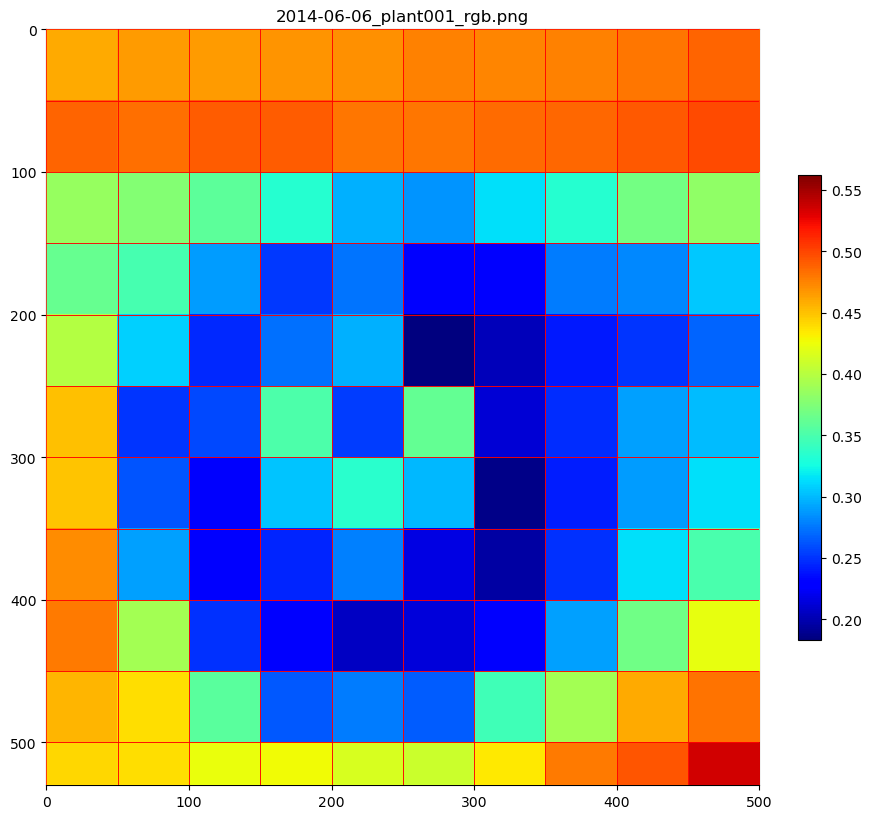

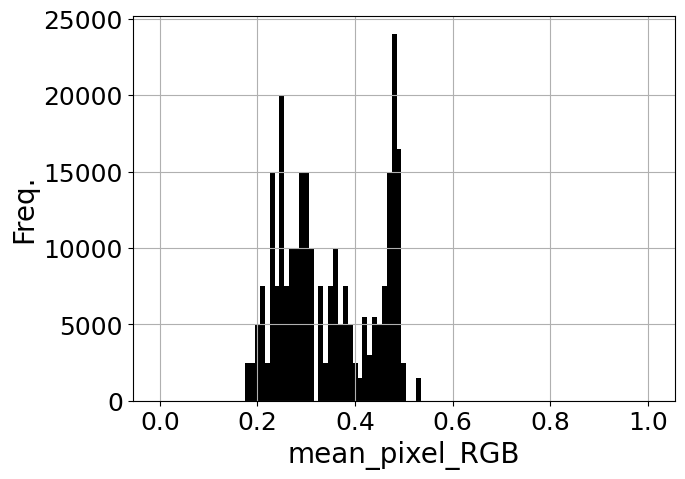

In [73]:
    value='mean_pixel_RGB'
    vmin=patch_df[value].min()
    vmax=patch_df[value].max()
    myimgs.show_par(parent_list[0], value=value, vmin=vmin, vmax=vmax)


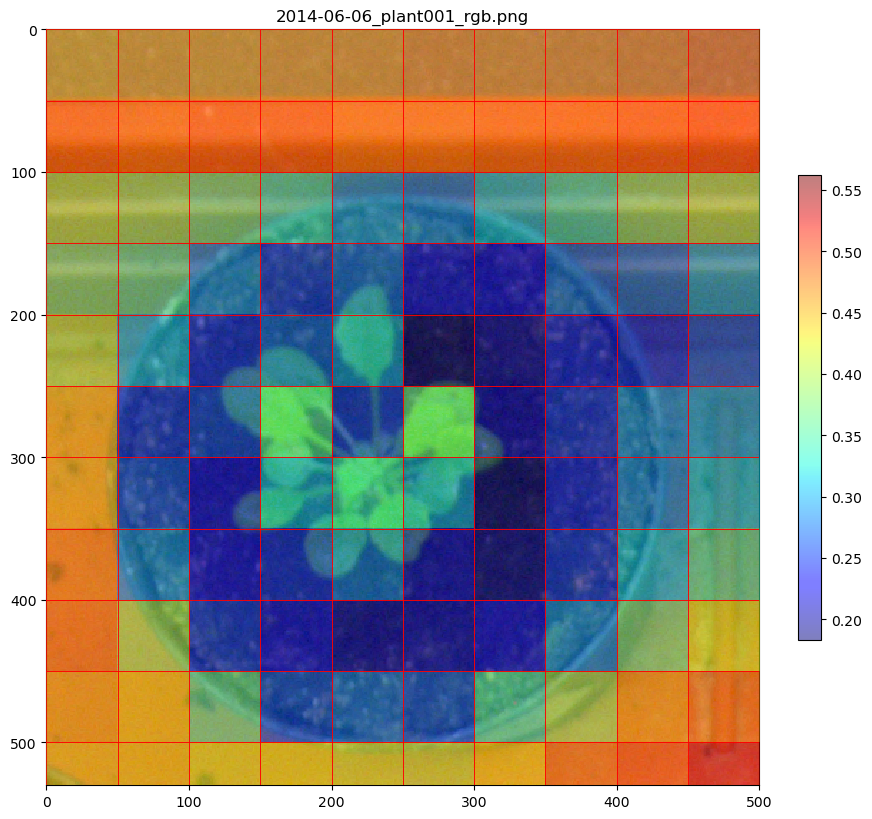

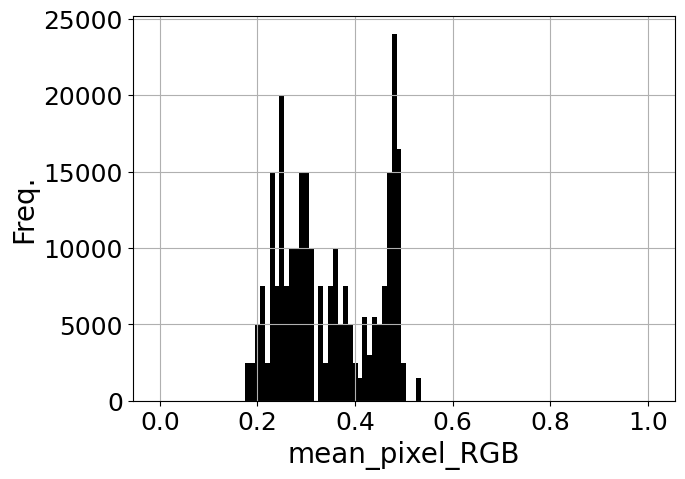

In [72]:
myimgs.show_par(parent_list[0], value="mean_pixel_RGB", vmin=patch_df['mean_pixel_RGB'].min(), vmax=patch_df['mean_pixel_RGB'].max(), alpha=0.5)

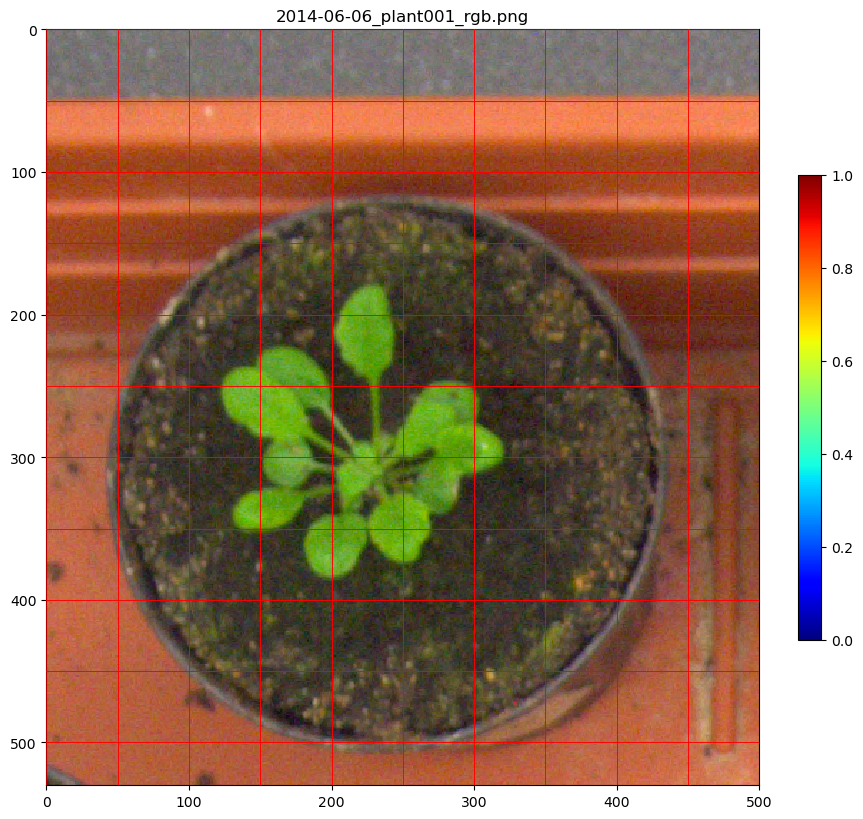

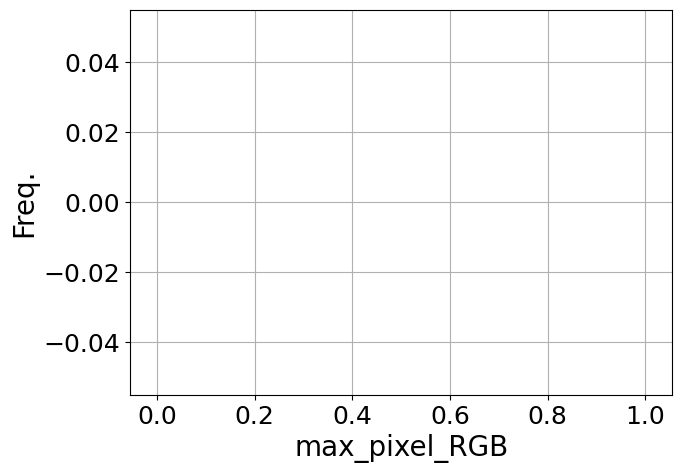

In [59]:
# List of all images
all_imgs = list(myimgs.images["parent"].keys())

# To plot the calculated means, use 
# value="mean_pixel"
myimgs.show_par(parents_list[0], 
                value="mean_pixel_RGB",
                border=False,
                plot_parent=True,
                vmin=0.0, vmax=1.0, 
                figsize=(20, 20),
                alpha=0.5, 
                colorbar="viridis")